#2.1アイリスデートセット

## 2.1.2可視化から始める

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

import numpy as np

In [2]:
# sklearnから load_iris関数を用いて、データをロードする。
data = load_iris()
print(data)

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

(150, 4)
['setosa' 'versicolor' 'virginica']
(150,)
(150,)


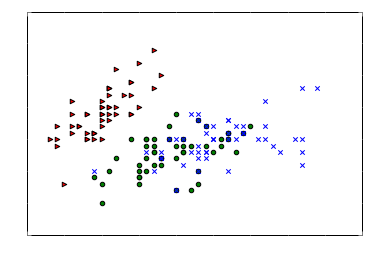

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(colors="white")
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']
labels = target_names[target]
print(features.shape)
print(target_names)
print(target.shape)
print(labels.shape)

for t, marker, c in zip(range(3), ">ox", "rgb"):
  # クラスごとに色の異なるマーカでプロットする
  plt.scatter(features[target == t, 0],
              features[target == t, 1],
              marker=marker,
              c=c)

## 2.1.2初めての分類モデル作成
「花弁の長さ」を用いることで、Setosaという品種のアイリスと他の品種を見分ける。

In [41]:
# 「花弁の長さ」は配列の3番目の （インデックス操作では2）に格納されている
plength = features[:, 2]
is_setosa = (labels == 'setosa')  # setosaかどうかのブーリアン配列を生成

# 次が重要な配列
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of setosa: {0}.'.format(min_non_setosa))

「もし花弁の長さが2より小さければ、それはSetosaという品種のアイリスであり、
それ以外であれば、それはVirginia か Versicolor という品種のアイリスである」というモデル

In [42]:
def apply_model(example):
  if example[2] < 2:
    print('Iris Setosa')
  else:
    print('Iris Virginica or Iris Versicolor')

これは本性で設計した最初のモデルです。単純ではあるが、Setosaとその他の品種のアイリスを誤りなく分類することができます。
Setosaとその他のアイリスを分類することはとても簡単に行えました。しかし、VirginicaとVersicolorについては、文ついのための最適な閾値は簡単いみつけることはできないでしょう。
実際のところ、完全に分類することはd系ないことがわかってくると思います。
しかし、ここではできるだけ最善の方法で分類できないか考えることにしましょう。そこで、次のような簡単な計算から始めることにします。

まず、Setosa以外の特徴量とラベルを選びます。

In [49]:
non_setosa_features = features[~is_setosa]
non_setosa_labels = labels[~is_setosa]
virginica = (non_setosa_labels == 'virginica')

print(non_setosa_features.shape)
print(non_setosa_labels.shape)
print(virginica.shape)

(100, 4)
(100,)
(100,)


次に、すべての特徴量とその閾値の組み合わせについて正解率（accuracy）を計算し、正解率の最も高い組み合わせを見つけたいと思います。ここで正解率とは、モデルが正しく分類できた割合をしまします。
また、閾値の候補はサンプルデータ（訓練データ）の各特徴量の値を用いることにします。

In [53]:
best_acc = -1.0
best_fi = -1.0
best_t = -1.0

for fi in range(non_setosa_features.shape[1]):
  # 各特徴量ごとに閾値の候補を生成する
  thresh = non_setosa_features[:, fi].copy()
  thresh.sort()

  # すべての閾値でテストする
  for t in thresh:
    pred = (non_setosa_features[:, fi] > t)
    acc = (non_setosa_labels[pred] == 'virginica').mean()
    if acc > best_acc:
      best_acc = acc
      best_fi = fi
      best_t = t

print(best_acc)
print(best_fi)
print(best_t)

1.0
0
6.3


/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
